# Models demo

This notebook demos several basic ML models using `sklearn`.

### Setup

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from sklearn import datasets

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

In [3]:
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [8., 8.]   # set default figure size as (8,8)

In [4]:
def plot_data(X, y, ax=None, color=True, alpha=0.8):
    '''
    Custom function to plot data
    '''
    if ax is None:
        ax = plt.gca()
    ax.scatter(X[y==0,0], X[y==0,1], s=40, marker='o', facecolor='none', 
                edgecolor='c' if color else 'k', alpha=alpha)
    ax.scatter(X[y==1,0], X[y==1,1], s=40, marker='x', c='k', alpha=alpha)
    ax.set(xlabel=r'$x_1$',
           ylabel=r'$x_2$')

def plot_decision_boundary(X, y, model, ax=None, fill=True):
    '''
    Custom function to plot the decision boundary of a classifier on 2D datat
    '''
    x_min, x_max = np.amin(X[:, 0]) - 1, np.amax(X[:, 0]) + 1
    y_min, y_max = np.amin(X[:, 1]) - 1, np.amax(X[:, 1]) + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.05),
                         np.arange(y_min, y_max, 0.05))
    
    Z = model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,0]
    Z = Z.reshape(xx.shape)

    if ax is None:
        ax = plt.gca()
    if fill:
        ax.contourf(xx, yy, Z,
                     cmap='RdBu', alpha=0.8)
        plot_data(X,y, ax=ax, color=False, alpha=0.4)
    else:
        ax.contour(xx, yy, Z, 
                    colors='k', linewidths=1, linestyles='dashed', 
                    levels=0.5, alpha=1.)
        plot_data(X,y, ax=ax, color=True, alpha=0.4)

## Generate some toy data

In [34]:
X, y = datasets.make_moons(n_samples=1000, noise=0.25)

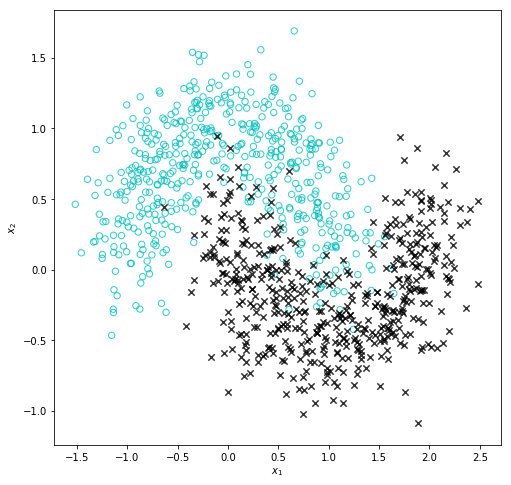

In [112]:
plot_data(X, y)

## Demo different classifiers

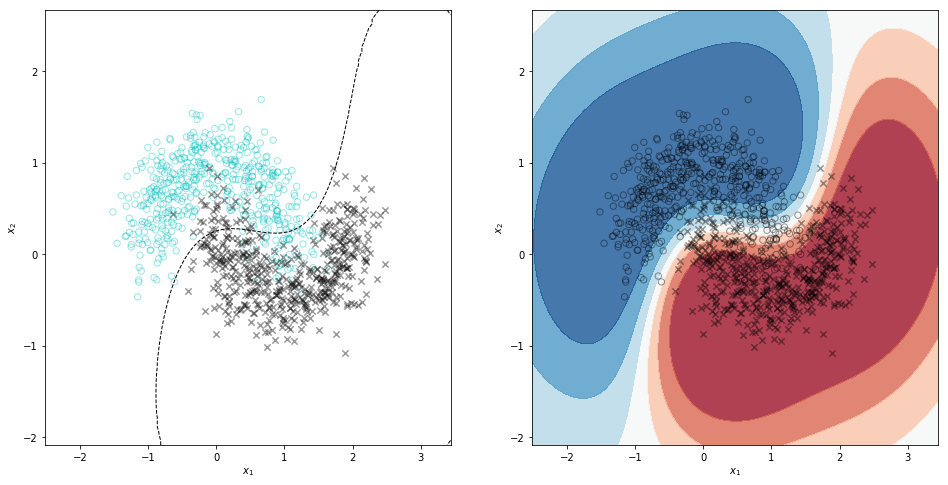

In [127]:
# clf = LogisticRegression().fit(X,y)
# clf = DecisionTreeClassifier(max_depth=3).fit(X, y)
# clf = RandomForestClassifier().fit(X, y)
# clf = SVC(C=0.1, kernel='rbf', probability=True).fit(X, y)
# clf = MLPClassifier(alpha=0.00001).fit(X, y)
# clf = MLPClassifier(hidden_layer_sizes=(1,), activation='identity').fit(X,y)

fig, axs = plt.subplots(1,2, figsize=(16,8))
plot_decision_boundary(X, y, clf, axs[0], fill=False)
plot_decision_boundary(X, y, clf, axs[1], fill=True)